In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu118


## 1. 주요 파라미터 지정

In [2]:
# 주요 학습 파라미터 지정 - batchsize, learningrate, epoch
batch_size = 256
learning_rate = 0.02
num_epoch = 10

## 2. 데이터 준비

In [3]:
# Mnist train, test 데이터 디렉토리에 배치
mnist_train = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 166697584.86it/s]

Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 10674629.35it/s]


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37250504.40it/s]

Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22733327.89it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



In [4]:
# DataLoader로 train, test 데이터 준비
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test,batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

## 3. 모델 정의

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()


        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(32 * 7 * 7, 256),
            nn.ReLU(),
            nn.Dropout(0.8),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.8),
            nn.Linear(256, 10)  # 출력 노드 수 10으로 설정
        )

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)  # Flatten the output for the fully connected layer
        out = self.fc_layer(out)
        return out


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = CNN().to(device)

# loss function - Cross Entropy
loss_func = nn.CrossEntropyLoss()
# Optimizer1 - Stochastic Gradient Descent
optimizer_sgd = torch.optim.SGD(model.parameters(), lr=learning_rate)


cuda:0


## 4-1. 모델 학습 진행

In [7]:
# 모델 학습 진행
loss_arr = []
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer_sgd.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer_sgd.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())


tensor(2.2973, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2563, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2818, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9142, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7726, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6426, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6742, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5353, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4451, device='cuda:0', grad_fn=<NllLossBackward0>)


## 5-1. 모델 평가

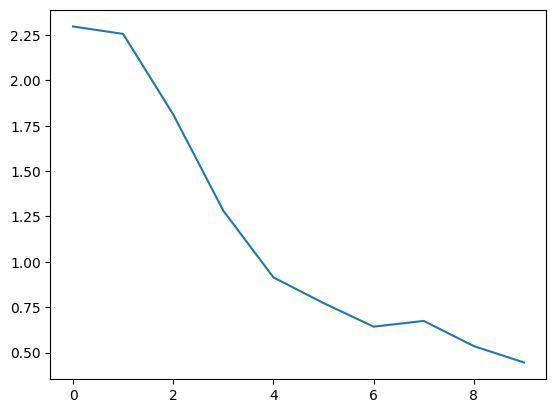

In [8]:
# loss function 시각화
plt.plot(loss_arr)
plt.show()

In [9]:
# Test Data로 model 예측 - accuracy 확인
correct, total = 0 , 0

with torch.no_grad():
  for image, label in test_loader:

    x = image.to(device)
    y_ = label.to(device)

    output = model.forward(x)

    _,output_index = torch.max(output,1)

    total += label.size(0)

    correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data : {}%".format(100*correct/total))

Accuracy of Test Data : 87.02424621582031%


## 4-2. 모델 학습 진행 - Adam Optimizer

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = CNN().to(device)

# loss function - Cross Entropy
loss_func = nn.CrossEntropyLoss()

# Optimizer2 - Adam
optimizer_adam = torch.optim.Adam(model.parameters(), lr=0.002)


cuda:0


In [15]:
# 모델 학습
loss_arr2 = []
for i in range(20):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer_adam.zero_grad()
    output1 = model.forward(x)
    loss = loss_func(output1, y_)
    loss.backward()
    optimizer_adam.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr2.append(loss.cpu().detach().numpy())

tensor(2.2985, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4665, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3423, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2536, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2197, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2288, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1361, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1598, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1971, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1835, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1953, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2264, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1851, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1599, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0933, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1776, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2014, device='cuda:0', grad_fn=

## 5-2. 모델 평가

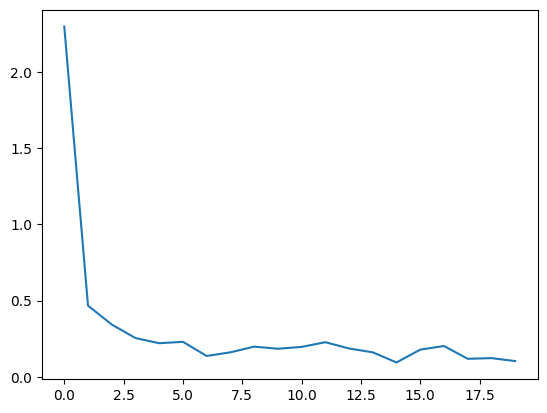

In [16]:
# loss function 시각화
plt.plot(loss_arr2)
plt.show()

In [17]:
# test data로 모델 prediction
correct, total = 0 , 0

with torch.no_grad():
  for image, label in test_loader:

    x = image.to(device)
    y_ = label.to(device)

    output1 = model.forward(x)

    _,output_index = torch.max(output1,1)

    total += label.size(0)

    correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data : {}%".format(100*correct/total))

Accuracy of Test Data : 95.45940399169922%
